# Tema2. Metodos jerarquicos

In [1]:
#Importando librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.spatial.distance import pdist, squareform #Para hallar los pares de distancias y matriz de distancias
from scipy.cluster.hierarchy import linkage #Para utilizar los linkages
from scipy.cluster.hierarchy import dendrogram #Para el gráfico de dendograma
from sklearn.preprocessing import MinMaxScaler #Para escalamiento de datos - normalización

from sklearn.cluster import AgglomerativeClustering #Para métodos jerárquicos aglomerativos AGNES
from sklearn.metrics import silhouette_score #Para calcular métrica de silueta
from sklearn.metrics import calinski_harabasz_score #Para calcular métrica de CH
from sklearn.metrics import davies_bouldin_score #Para calcular métrica de DB

#Just in Case
import warnings
warnings.filterwarnings('ignore')


### _Agrupamiento ilustrativo mediante datos simulados_

In [2]:
#Creando un conjunto de datos aleatorios con Dist. Uniforme
np.random.seed(123)

In [3]:
variables=['X','Y','Z']
labels=['id0','id1','id2','id3','id4']

X=np.random.random_sample([5,3])*10
df=pd.DataFrame(X,columns=variables, index=labels)
df

,X,Y,Z
id0,6.964692,2.861393,2.268515
id1,5.513148,7.194690,4.231065
id2,9.807642,6.848297,4.809319
id3,3.921175,3.431780,7.290497
id4,4.385722,0.596779,3.980443


### _Utilizando la libreria Scipy_

In [4]:
#Obteniendo los pares de distancias(En forma condensada) solamente tenemos la de la matriz triangular inferior
paresdistancia=pdist(df,metric='euclidean')
paresdistancia

array([4.973534  , 5.51665266, 5.89988504, 3.83539555, 4.34707339,
       5.10431109, 6.69823298, 7.24426159, 8.31659367, 4.382864  ])

In [5]:
#mostramos la matriz para visualizar paresdistancia (matriz de distancia en forma cuadrada)
mat_dist=squareform(paresdistancia)
mat_dist

array([[0.        , 4.973534  , 5.51665266, 5.89988504, 3.83539555],
       [4.973534  , 0.        , 4.34707339, 5.10431109, 6.69823298],
       [5.51665266, 4.34707339, 0.        , 7.24426159, 8.31659367],
       [5.89988504, 5.10431109, 7.24426159, 0.        , 4.382864  ],
       [3.83539555, 6.69823298, 8.31659367, 4.382864  , 0.        ]])

In [6]:
#Generando el historial de aglomeración
clusters=linkage(paresdistancia, method='single')
pd.DataFrame(clusters, columns=['Obs1','Obs2','Distancia','NroItems'],index=['Aglom1','Aglom2','Aglom3','Aglom4'])

,Obs1,Obs2,Distancia,NroItems
Aglom1,0.0,4.0,3.835396,2.0
Aglom2,1.0,2.0,4.347073,2.0
Aglom3,3.0,5.0,4.382864,3.0
Aglom4,6.0,7.0,4.973534,5.0


In [7]:
#FORMA ADICIONAL
#Generando el historial de aglomeración
clusters2=linkage(df.values, metric='euclidean',method='single')
pd.DataFrame(clusters, columns=['Obs1','Obs2','Distancia','NroItems'],index=['Aglom1','Aglom2','Aglom3','Aglom4'])

,Obs1,Obs2,Distancia,NroItems
Aglom1,0.0,4.0,3.835396,2.0
Aglom2,1.0,2.0,4.347073,2.0
Aglom3,3.0,5.0,4.382864,3.0
Aglom4,6.0,7.0,4.973534,5.0


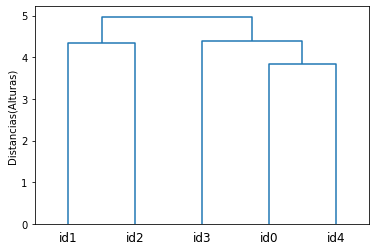

In [8]:
#Graficar Dendograma
dendograma=dendrogram(clusters,labels=labels)
plt.ylabel('Distancias(Alturas)')
plt.show()

### _Utilizando la libreria Sickit Learn_

In [9]:
#Instanciando un objeto de clase AgglomerativeClustering
agnes= AgglomerativeClustering(n_clusters=2, #numero de clusters
                              affinity='euclidean', # funcion de distancia
                              linkage='single')# metodo de enlace

In [10]:
#Obteniendo las etiquetas de cluster
labels=agnes.fit_predict(X)
labels

array([0, 1, 1, 0, 0], dtype=int64)

In [11]:
#Obteniendo mi data simulada final
df['cluster']=labels
df

,X,Y,Z,cluster
id0,6.964692,2.861393,2.268515,0
id1,5.513148,7.194690,4.231065,1
id2,9.807642,6.848297,4.809319,1
id3,3.921175,3.431780,7.290497,0
id4,4.385722,0.596779,3.980443,0


#### _CASO PRÁCTICO: DISTRITOS_

In [12]:
#Estableciendo directorio
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [13]:
#Estableciendo nuestro directorio de trabajo
miArchivo="distritos.sav"
distritos=pd.read_spss(miArchivo)
distritos.head()

,distrito,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15
0,Ate,1.15,5.3,27.60,51.10,3.9,1.1,63.48
1,Barranco,1.09,4.5,1.59,8.32,0.8,3.9,33.48
2,Breña,1.08,4.4,2.20,23.15,0.9,4.0,37.89
3,Carabayllo,1.10,5.1,30.13,38.09,4.5,12.6,63.65
4,Comas,1.20,5.9,10.92,24.27,3.8,9.4,60.37


In [14]:
# Estableciendo nuestra matriz de datos 
X=distritos.iloc[:,1:]
X.head()

,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15
0,1.15,5.3,27.60,51.10,3.9,1.1,63.48
1,1.09,4.5,1.59,8.32,0.8,3.9,33.48
2,1.08,4.4,2.20,23.15,0.9,4.0,37.89
3,1.10,5.1,30.13,38.09,4.5,12.6,63.65
4,1.20,5.9,10.92,24.27,3.8,9.4,60.37


In [15]:
#Escalamiento de los datos
mms=MinMaxScaler()
x_mms=mms.fit_transform(X)

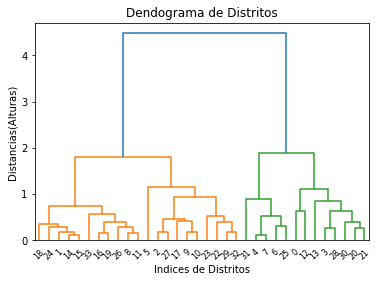

In [16]:
#Graficando mi Dendograma
clusters=linkage(x_mms,metric='euclidean',method='ward')
dendograma=dendrogram(clusters)
plt.title('Dendograma de Distritos')
plt.xlabel('Indices de Distritos')
plt.ylabel('Distancias(Alturas)')
plt.show()

In [17]:
#Visualmente nos quedamos con 2 clusters
agnes=AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
y_clust=agnes.fit_predict(x_mms)
y_clust

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [18]:
distritos['cluster']=y_clust
distritos.head()

,distrito,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15,cluster
0,Ate,1.15,5.3,27.60,51.10,3.9,1.1,63.48,0
1,Barranco,1.09,4.5,1.59,8.32,0.8,3.9,33.48,1
2,Breña,1.08,4.4,2.20,23.15,0.9,4.0,37.89,1
3,Carabayllo,1.10,5.1,30.13,38.09,4.5,12.6,63.65,0
4,Comas,1.20,5.9,10.92,24.27,3.8,9.4,60.37,0


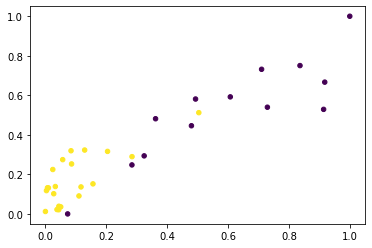

In [19]:
#Graficando los clusters
plt.scatter(x_mms[:,2], #valores eje X
            x_mms[:,3], #valores eje Y
            c=y_clust, 
            s=20)

### Hallando el numero de k_optimo con distintos criterios de evaluación

Text(0.5, 1.0, 'Davies Bouldin para distritos')

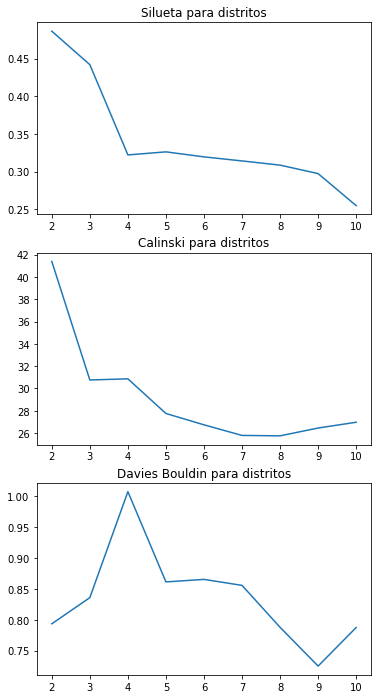

In [24]:
silueta=[]
calinski=[]
DB=[]
fig, ax =plt.subplots(3,1)
fig.set_size_inches(6,12)
for i in range (2,11):
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    silueta.append(silhouette_score(x_mms,hc.fit_predict(x_mms)))
    calinski.append(calinski_harabasz_score(x_mms,hc.fit_predict(x_mms)))
    DB.append(davies_bouldin_score(x_mms,hc.fit_predict(x_mms)))
    
ax[0].plot(range(2,11),silueta)
ax[0].set_title("Silueta para distritos (Max-Value)")
ax[1].plot(range(2,11),calinski)
ax[1].set_title("Calinski para distritos (Max-Value)")
ax[2].plot(range(2,11),DB)
ax[2].set_title("Davies Bouldin para distritos (Min-Value)")

plt.show()

In [32]:
# Para silueta, el valor que nos importa es el maximo, el punto maximo de la linea cae en el cluster = 2
# Para Calinski, el valor que nos importa es el maximo, el punto maximo de la linea cae en el cluster = 2
# Para Davies Bouldin, el valor que nos importa es el minimo, el punto minimo de la linea cae en el cluster = 9
#CONCLUSION: COMO silueta y Calinski dan como resultado optimo cluster= 2 y solo Davies Bouldin difiere entonces se da por 
#hecho que el numero optimo de clusters es 2

### Hallando el mejor metodo de vinculación para un k_optimo 

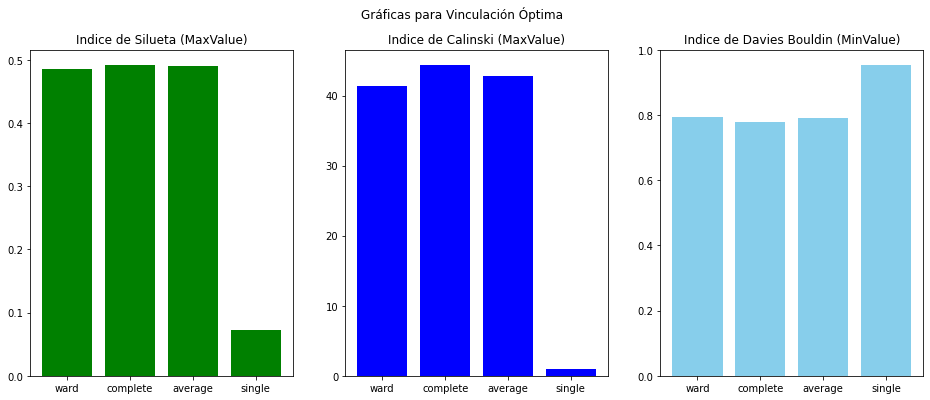

In [31]:
k_optimo=2
linkages=["ward","complete","average","single"]

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_size_inches(16,6)
fig.suptitle("Gráficas para Vinculación Óptima")

silueta=[]
calinski=[]
DB=[]

for i in range(0,len(linkages)):
    hc=AgglomerativeClustering(n_clusters=k_optimo,affinity="euclidean",linkage=linkages[i])
    silueta.append(silhouette_score(x_mms,hc.fit_predict(x_mms)))
    calinski.append(calinski_harabasz_score(x_mms,hc.fit_predict(x_mms)))
    DB.append(davies_bouldin_score(x_mms,hc.fit_predict(x_mms)))
    
#Acerca de gráficas
ax1.bar(linkages,silueta,color='green')
ax1.set_title("Indice de Silueta (MaxValue)")
ax2.bar(linkages,calinski,color='blue')
ax2.set_title("Indice de Calinski (MaxValue)")
ax3.bar(linkages,DB,color='skyblue')
ax3.set_title("Indice de Davies Bouldin (MinValue)")

plt.show()


***Del análisis de la estructura de datos, se puede deducir un numero optimo de clusters igual a 2 con un metodo de vinculación "complete"***